<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [ ]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [ ]:
import requests

async def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)


In [ ]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [ ]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [ ]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<ipython-input-12-6faff29553c7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], hist = False, kde = True,


Text(0, 0.5, 'Number of Respondents')

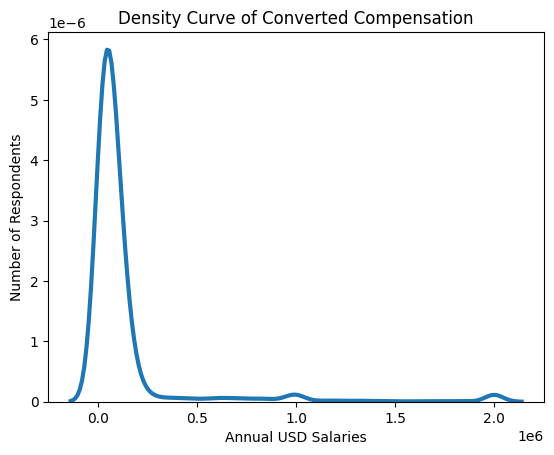

In [ ]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib's pyplot module

# Draw the density plot
sns.distplot(df['ConvertedComp'], hist = False, kde = True,
             kde_kws = {'linewidth': 3})

# Plot formatting
plt.title('Density Curve of Converted Compensation')
plt.xlabel('Annual USD Salaries')
plt.ylabel('Number of Respondents')


Plot the histogram for the column `ConvertedComp`.


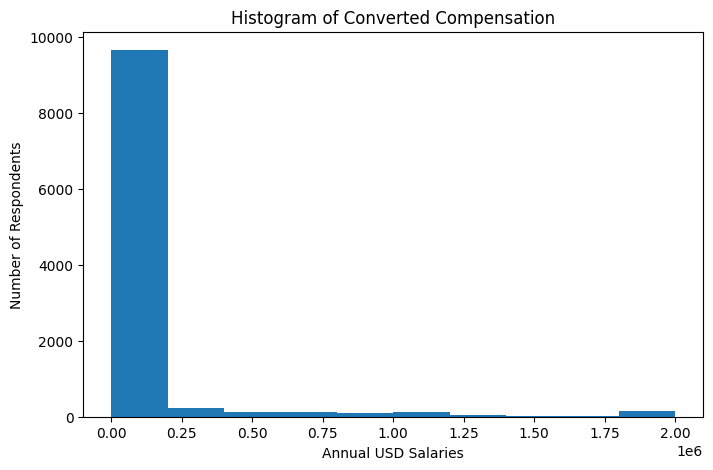

In [ ]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Converted Compensation')
# add y-label
plt.ylabel('Number of Respondents')
# add x-label
plt.xlabel('Annual USD Salaries')

plt.show()

What is the median of the column `ConvertedComp`?


In [ ]:
median_age = df['Age'].median()
print(f"The median age of survey respondents is: {median_age}")

The median age of survey respondents is: 29.0


In [ ]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [ ]:
# your code goes here
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [ ]:
# your code goes here
df.loc[(df['Gender'] == 'Woman'), 'ConvertedComp'].median()

57708.0

**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


Give the five number summary for the column `Age`?


In [ ]:
# your code goes here
# min,q1,median,q3,max of a column are its five number summary.

In [ ]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


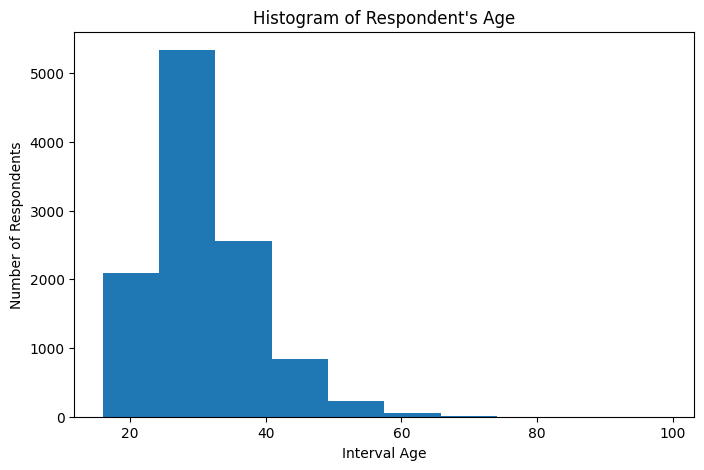

In [ ]:
df['Age'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title("Histogram of Respondent's Age")
# add y-label
plt.ylabel('Number of Respondents')
# add x-label
plt.xlabel('Interval Age')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


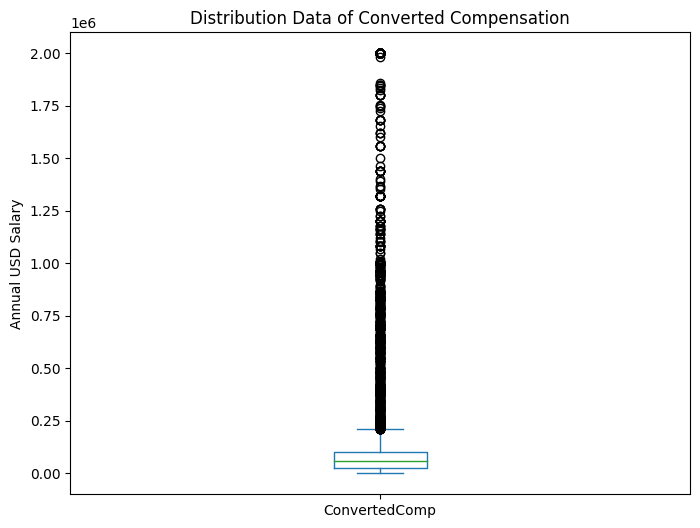

In [ ]:
# your code goes here
import matplotlib.pyplot as plt


df['ConvertedComp'].plot(kind='box', figsize=(8, 6))

plt.title('Distribution Data of Converted Compensation')
plt.ylabel('Annual USD Salary')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [ ]:
# your code goes here
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [ ]:
df['ConvertedComp'].median()

57745.0

In [ ]:
# Q1, Q3, and IQR
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [ ]:
# your code goes here
# your code goes here
upper_bounds = Q3 + 1.5 * IQR
print('Upper Bounds :', upper_bounds)
lower_bounds = Q1 - 1.5*IQR
print('Lower Bounds :', lower_bounds)

Upper Bounds : 209698.0
Lower Bounds : -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
# your code goes here
outlier =[]
for x in df['ConvertedComp']:
  if ((x > upper_bounds) or (x < lower_bounds)):
    outlier.append(x)
print(' outlier in the ConvertedComp column is', len(outlier))

 outlier in the ConvertedComp column is 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
# your code goes here
# Removing outliers
df_removed_outlier = df['ConvertedComp'][~((df['ConvertedComp'] < lower_bounds) |
                                           (df['ConvertedComp'] > upper_bounds))]
df_removed_outlier.describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

In [ ]:
df_removed_outlier.mean()

59883.20838915799

In [ ]:
df_removed_outlier.median()

52704.0

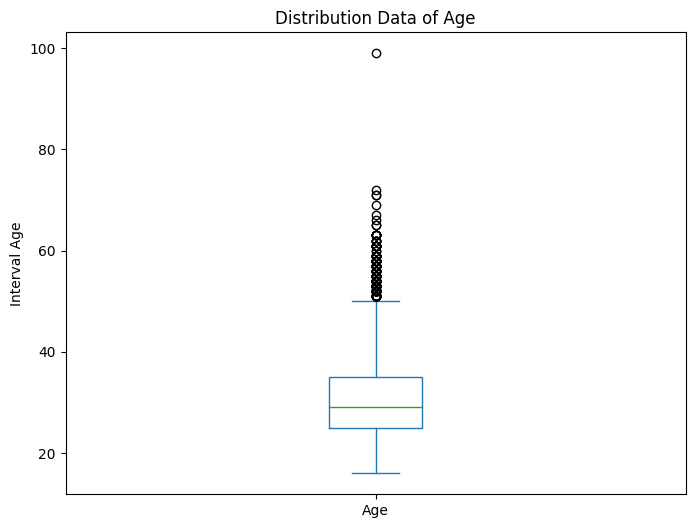

In [ ]:
df['Age'].plot(kind='box', figsize=(8, 6))

plt.title('Distribution Data of Age')
plt.ylabel('Interval Age')

plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


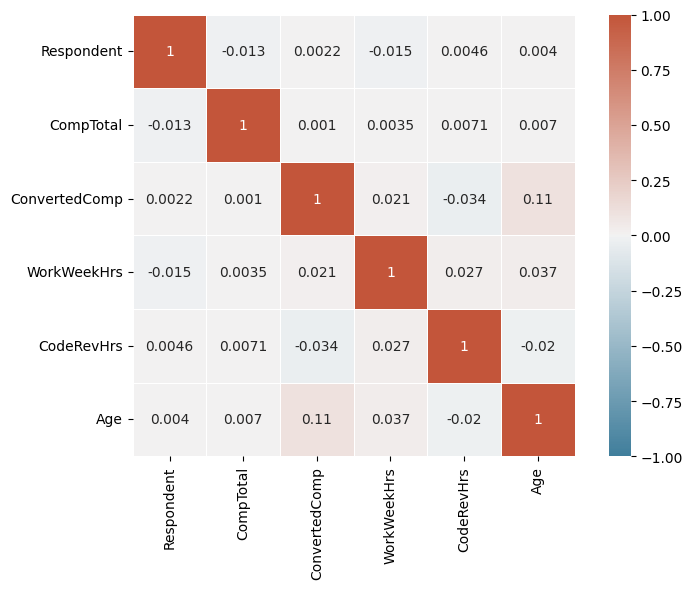

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Create a diverging color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap=cmap, annot=True, center=0, vmin=-1, square=True, linewidths=.5)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Ensure your DataFrame 'df' is already defined and contains the 'Age' column

# Convert the 'Age' column to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with NaN values in the 'Age' column
df_clean = df.dropna(subset=['Age'])

# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Get the correlation values with the "Age" column
age_correlation = corr['Age']

# Filter and print columns with negative correlation with "Age"
negative_corr_columns = age_correlation[age_correlation < 0]

print("Columns with a negative correlation with 'Age':")
print(negative_corr_columns)


Columns with a negative correlation with 'Age':
CodeRevHrs   -0.020469
Name: Age, dtype: float64


In [ ]:
import pandas as pd
import numpy as np

# Ensure your DataFrame 'df' is already defined and contains the 'Age' column

# Convert the 'Age' column to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with NaN values in the 'Age' column
df_clean = df.dropna(subset=['Age'])

# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Get the correlation values with the "Age" column
age_correlation = corr['Age']

# Find the column with the highest correlation with "Age"
# Exclude "Age" itself by filtering it out
age_correlation_no_self = age_correlation.drop(labels=['Age'])
highest_corr_column = age_correlation_no_self.idxmax()
highest_corr_value = age_correlation_no_self.max()

print(f"The column with the highest correlation with 'Age' is '{highest_corr_column}' with a correlation of {highest_corr_value}.")


The column with the highest correlation with 'Age' is 'ConvertedComp' with a correlation of 0.10538616072629158.


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
